In [360]:
import pandas as pd
import seaborn as sns
sns.set()
%matplotlib inline

In [36]:
df = pd.read_csv(r'aprsdata.csv')

In [478]:
# df['time'] = df['time'].apply(lambda x: x - dt.timedelta(4/24))
# df['lasttime'] = df['lasttime'].apply(lambda x: x - dt.timedelta(4/24))

In [40]:
df['time'] = pd.to_datetime(df['time'])
df['lasttime'] = pd.to_datetime(df['lasttime'])

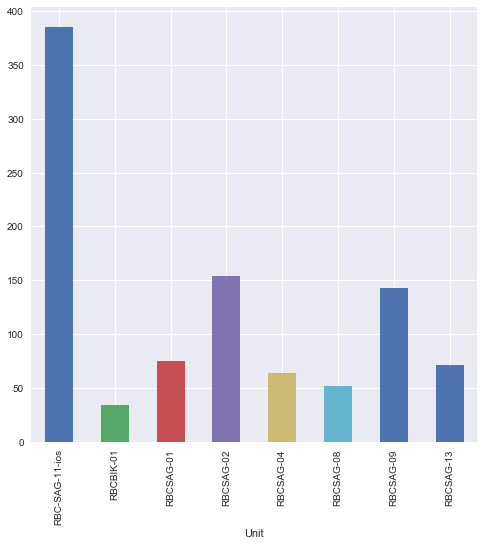

In [484]:
df.groupby(by=['Unit'])['lat'].count().plot(kind='bar', figsize=(8,8))

In [262]:
df['c'] = ''
for i,j in zip(df.Unit.unique(),['r','y','b','g','k','m','w']):
    df.loc[df['Unit'] == i,'c'] = j

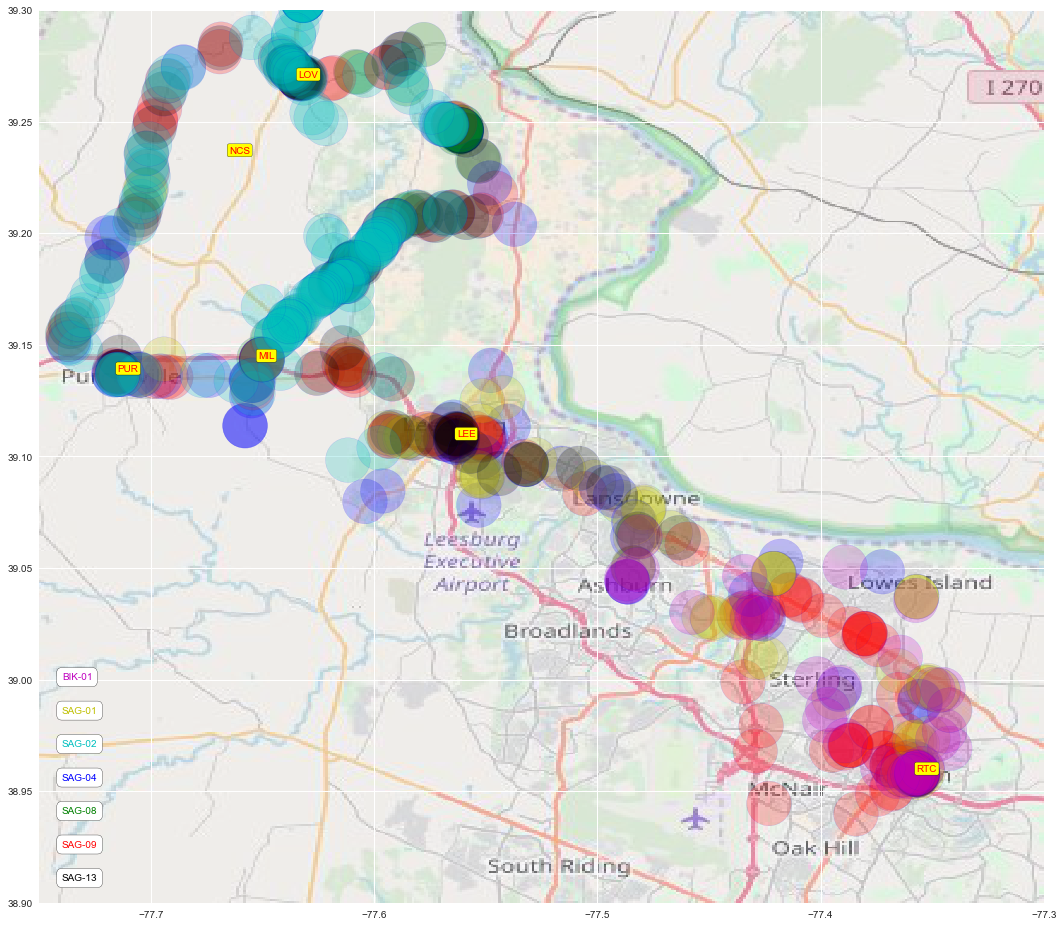

In [414]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imread
import matplotlib.cbook as cbook

df2 = df.loc[df['altitude'].notnull()]
# df2 = df[df['Unit'] == 'RBCSAG-01']

x = df2['lng']
y = df2['lat']
u = df2['unit2'].values
c = df2['c']

img = imread(r'c:\Users\collins\Downloads\map.jpg')
plt.figure(figsize=(18,18))

plt.imshow(img, zorder=0, extent=[-77.75, -77.3, 38.9, 39.3], alpha=0.75)
plt.scatter(x, y, c=c, edgecolors='b', s=2000, alpha=0.22)
plt.xlim(-77.75,-77.3)
plt.ylim(38.9,39.3)

# # Fixed Stations
names = ['PUR','LEE','LOV','MIL','NCS','RTC']
lats = [-77.714943,-77.563,-77.634,-77.652,-77.665,-77.357]
lons = [39.138259,39.109,39.27,39.144,39.236,38.959]

for i,j,s in zip(names,lats,lons):
    plt.annotate(i, xy=(j, s), color='red',
                 bbox=dict(boxstyle='round,pad=0.2', fc='yellow'))

legx, legy = -77.74,39 
for key,value in sorted(df2.groupby(by='unit2')['c'].max().to_dict().items()):
    plt.annotate(key, xy=(legx,legy), color=value,
                bbox=dict(boxstyle='round,pad=0.5', fc='white'))
    legy -= .015
    
plt.show()



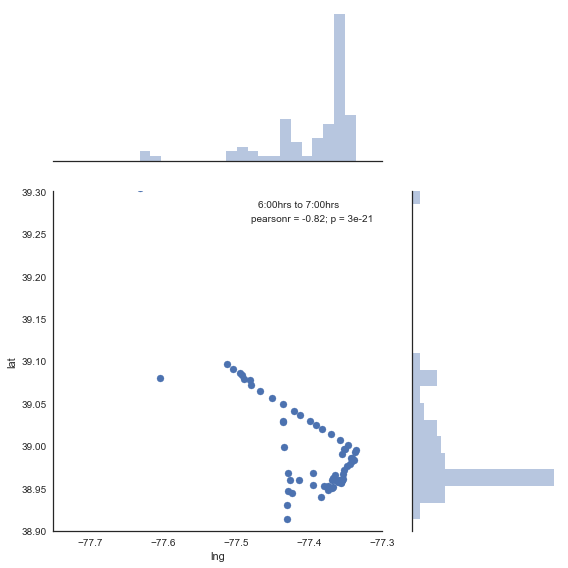

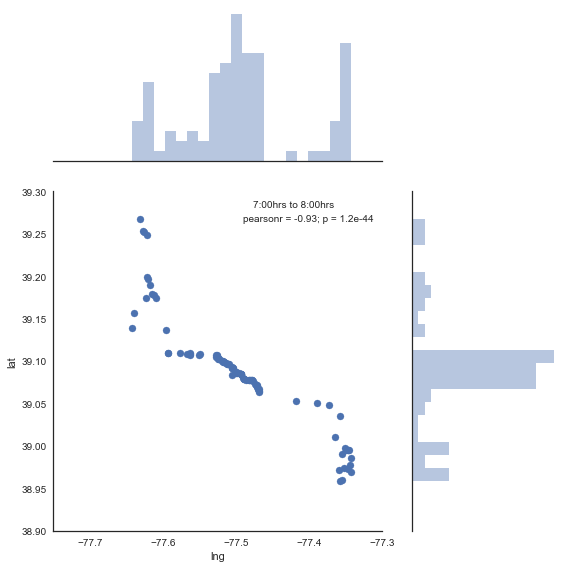

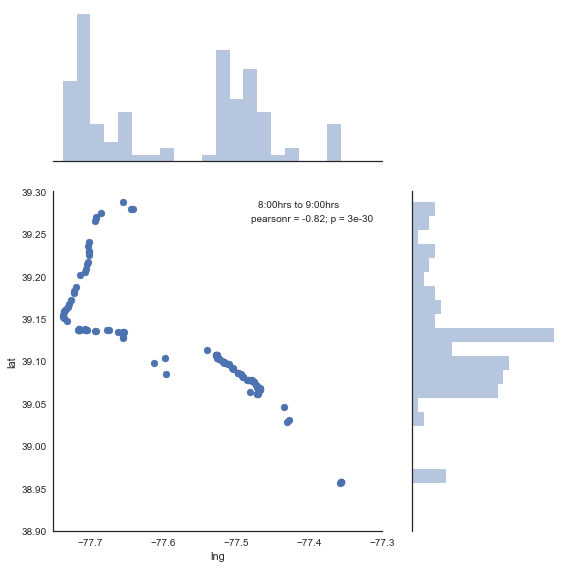

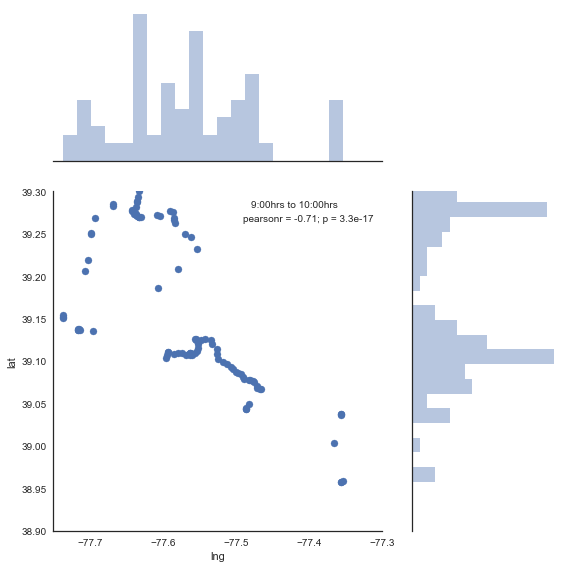

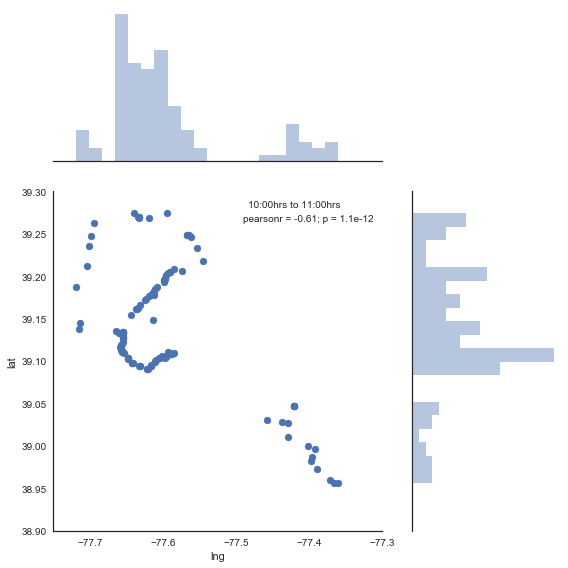

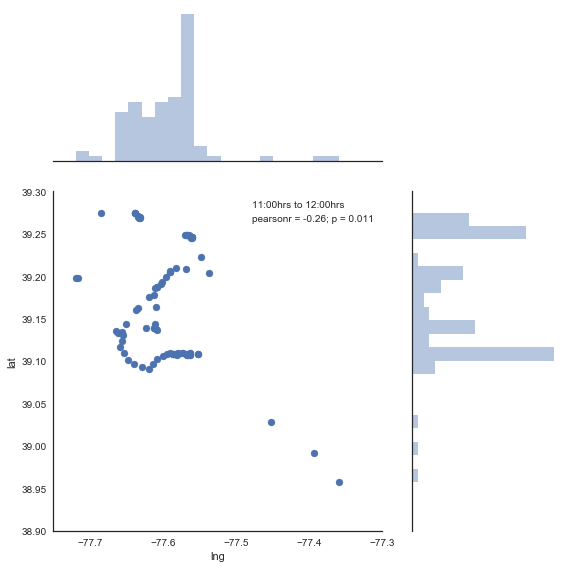

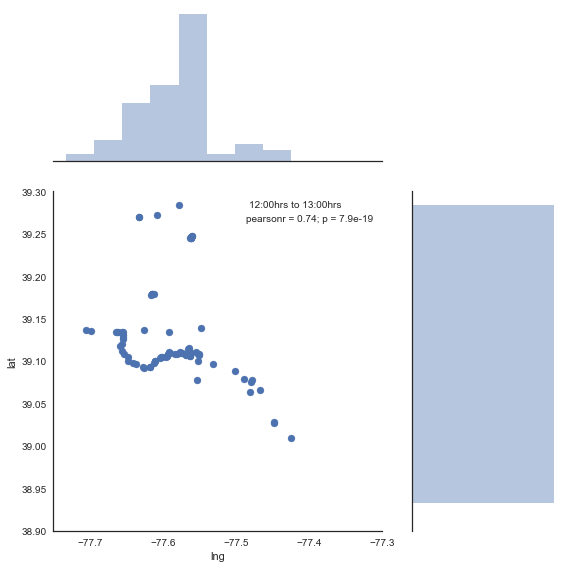

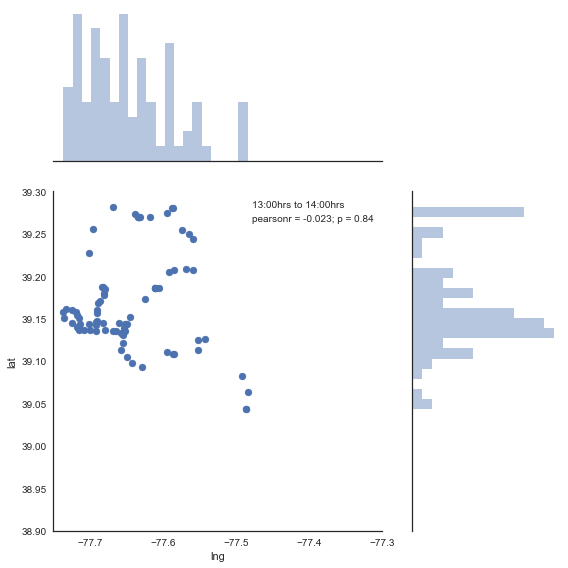

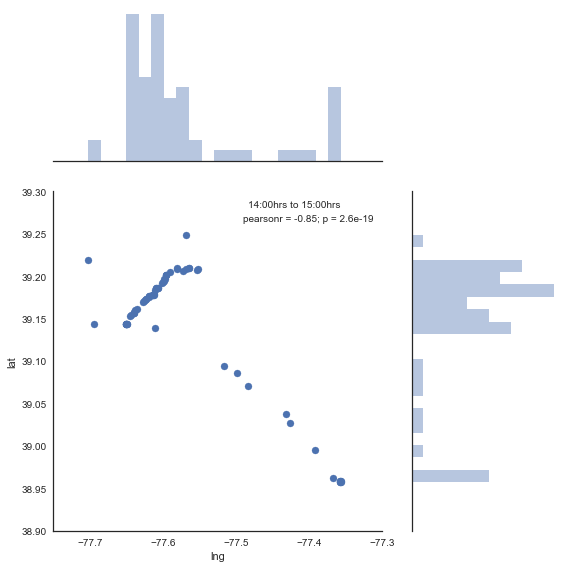

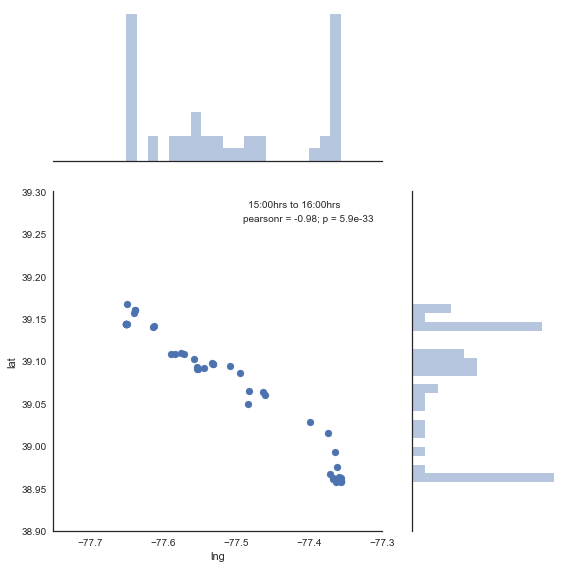

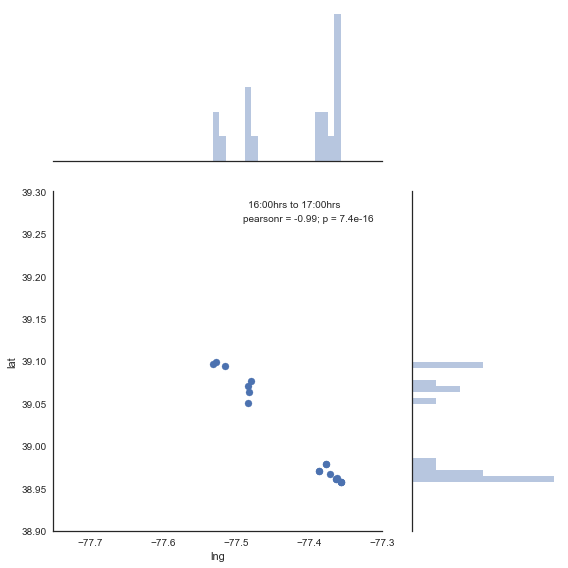

In [488]:
for i in range(6,17):
    with sns.axes_style('white'):
        sns.jointplot("lng", "lat", data=df[(pd.datetime(2018,8,26,i,0)<df['time']) & (df['time']<pd.datetime(2018,8,26,i+1,0))], kind='scatter',
                      xlim=(-77.75,-77.3),
                      ylim=(38.9,39.3),
                      size=8, ratio=2,
                      annot_kws=dict(title=str(i)+':00hrs to '+str(i+1)+':00hrs'),
                      marginal_kws=dict(bins=20))